In [53]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('house_price_data.csv')

# Display first 5 rows
print(df.head())


   property_id neighborhood  distance_to_city_center  distance_to_metro  \
0  PROP_000001  Forest Glen                      6.6                908   
1  PROP_000002     Lakeside                      2.6                 84   
2  PROP_000003     Downtown                     10.2                 50   
3  PROP_000004    Riverside                      5.1                475   
4  PROP_000005      Oakwood                      0.5                647   

   distance_to_school  crime_rate  house_age  total_area  bedrooms  bathrooms  \
0                 296         1.0         22         103         3          3   
1                  30         1.0         12         114         2          2   
2                 120         1.0         21          83         5          3   
3                  48         1.0          0         127         3          1   
4                 111         1.0         21          59         6          2   

   ...  construction_quality  renovation_status  heating_type 

In [54]:
# Count missing values per column
missing_values = df.isnull().sum()

# Show only columns with missing values
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [55]:
# Get numerical summary
print(df.describe())

# For categorical columns (e.g. neighbourhood, renovation status)
print(df.select_dtypes(include='object').describe())


       distance_to_city_center  distance_to_metro  distance_to_school  \
count              8000.000000        8000.000000         8000.000000   
mean                  3.785213         337.536250          148.724875   
std                   3.953137         350.469891          165.435271   
min                   0.500000          50.000000           30.000000   
25%                   1.000000          94.750000           35.000000   
50%                   2.500000         221.000000           90.000000   
75%                   5.100000         455.000000          194.000000   
max                  25.000000        3000.000000         1748.000000   

       crime_rate    house_age   total_area     bedrooms    bathrooms  \
count      8000.0  8000.000000  8000.000000  8000.000000  8000.000000   
mean          1.0    14.295125   150.608125     3.359500     2.502875   
std           0.0    14.677669    83.534599     1.129345     0.802074   
min           1.0     0.000000    50.000000     1.

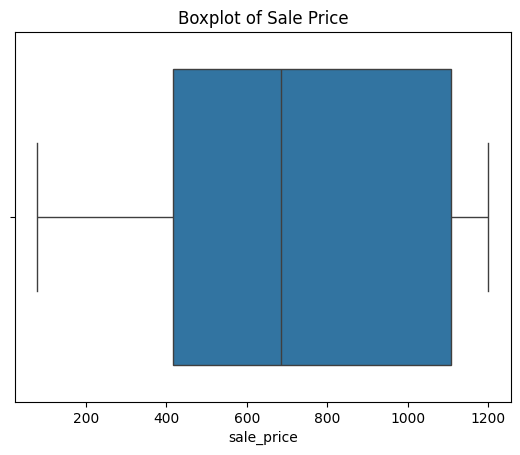

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['sale_price'])
plt.title("Boxplot of Sale Price")
plt.show()


In [57]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = df.select_dtypes(include='number').apply(zscore)

# Identify rows with any z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")


Number of outlier rows: 852


/usr/local/lib/python3.11/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [58]:
print(df['neighborhood'].unique())
print(df['renovation_status'].value_counts())


['Forest Glen' 'Lakeside' 'Downtown' 'Riverside' 'Oakwood'
 'Coastal Heights' 'Garden City' 'Elmwood' 'Cedar Park' 'Prairie Meadows'
 'Maple Heights' 'Mountain View' 'Hillcrest' 'Sunset District'
 'Pine Valley']
renovation_status
Never      3227
Partial    3181
Full       1592
Name: count, dtype: int64


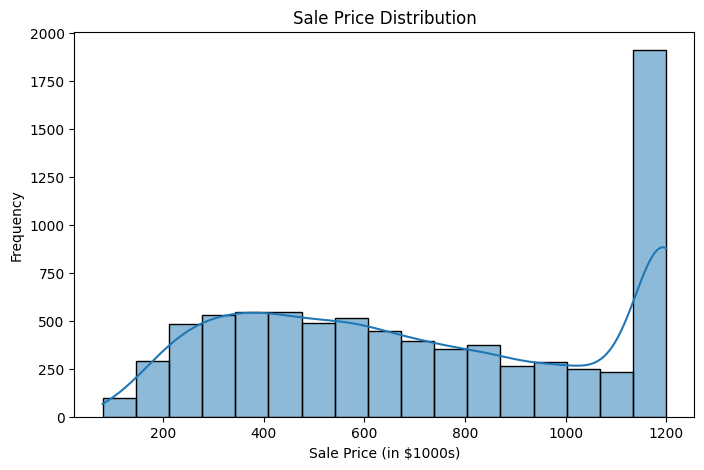

Skewness of sale price: 0.07


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['sale_price'], kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price (in $1000s)")
plt.ylabel("Frequency")
plt.show()

# Skewness
skewness = skew(df['sale_price'])
print(f"Skewness of sale price: {skewness:.2f}")


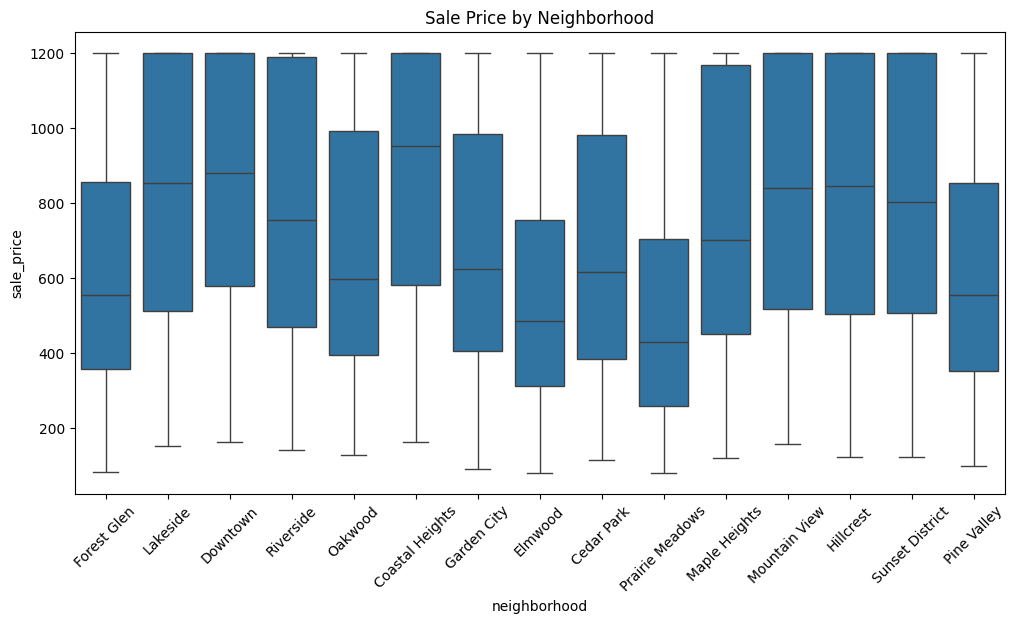

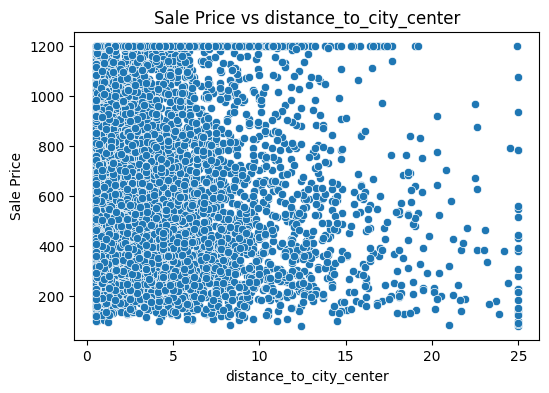

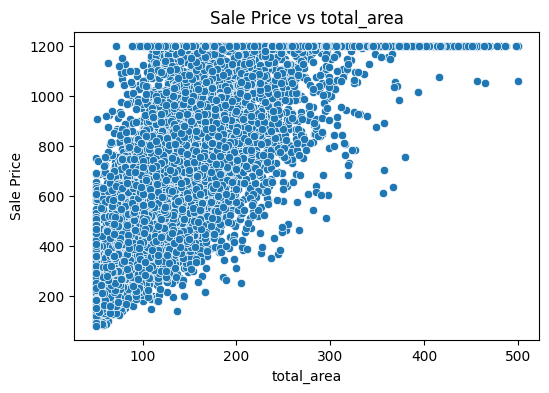

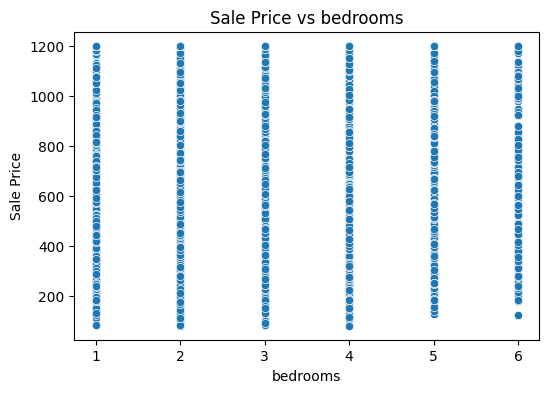

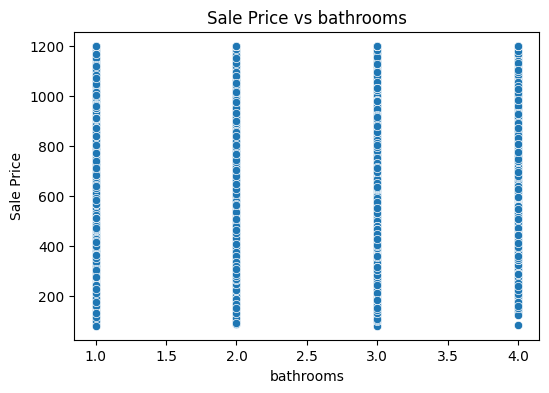

In [60]:
# Boxplot: Neighborhood vs Sale Price
plt.figure(figsize=(12,6))
sns.boxplot(x='neighborhood', y='sale_price', data=df)
plt.xticks(rotation=45)
plt.title("Sale Price by Neighborhood")
plt.show()

# Scatter plots for key features vs price
features = ['distance_to_city_center', 'total_area', 'bedrooms', 'bathrooms']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['sale_price'])
    plt.title(f'Sale Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()


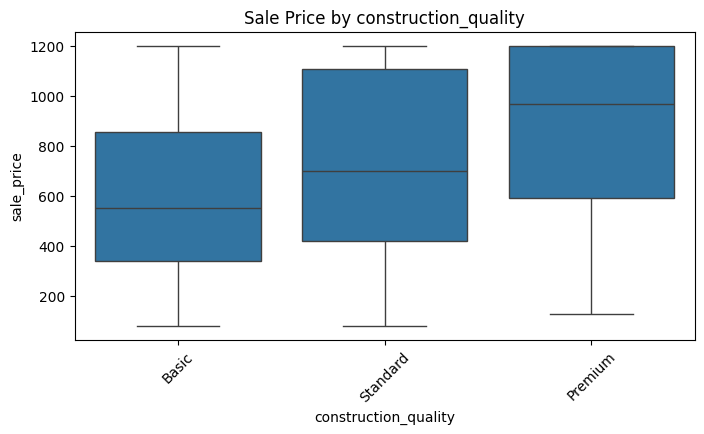

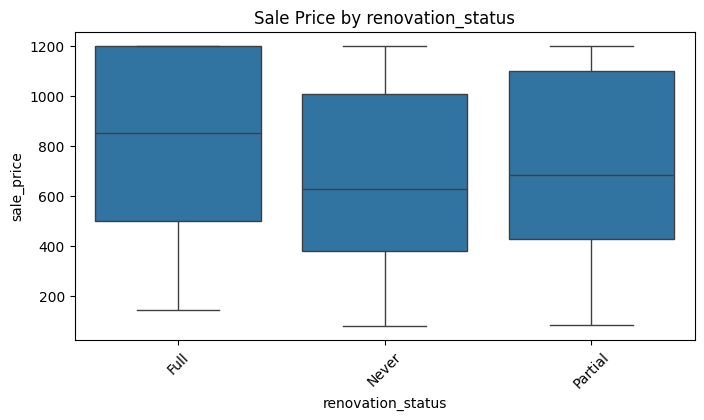

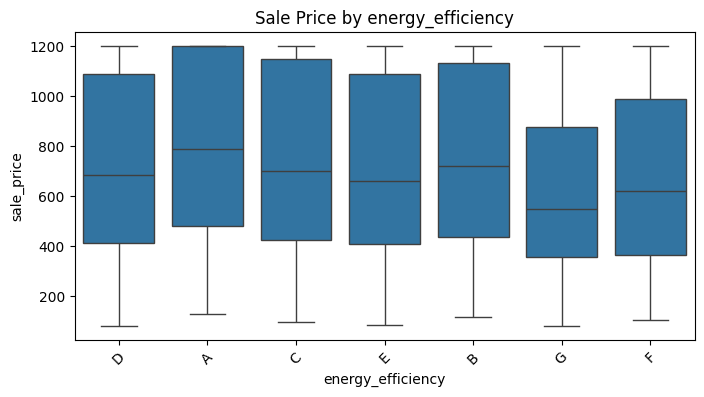

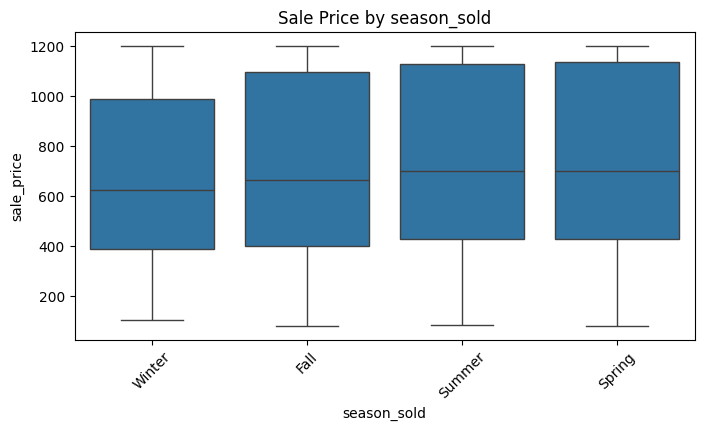

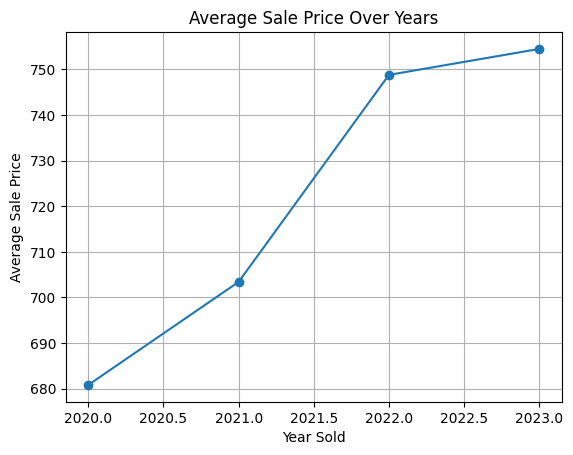

In [61]:
# Boxplots for categorical quality indicators
quality_features = ['construction_quality', 'renovation_status', 'energy_efficiency', 'season_sold']

for feature in quality_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=feature, y='sale_price', data=df)
    plt.title(f'Sale Price by {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Line plot for year sold
df.groupby('year_sold')['sale_price'].mean().plot(marker='o')
plt.title('Average Sale Price Over Years')
plt.ylabel('Average Sale Price')
plt.xlabel('Year Sold')
plt.grid(True)
plt.show()


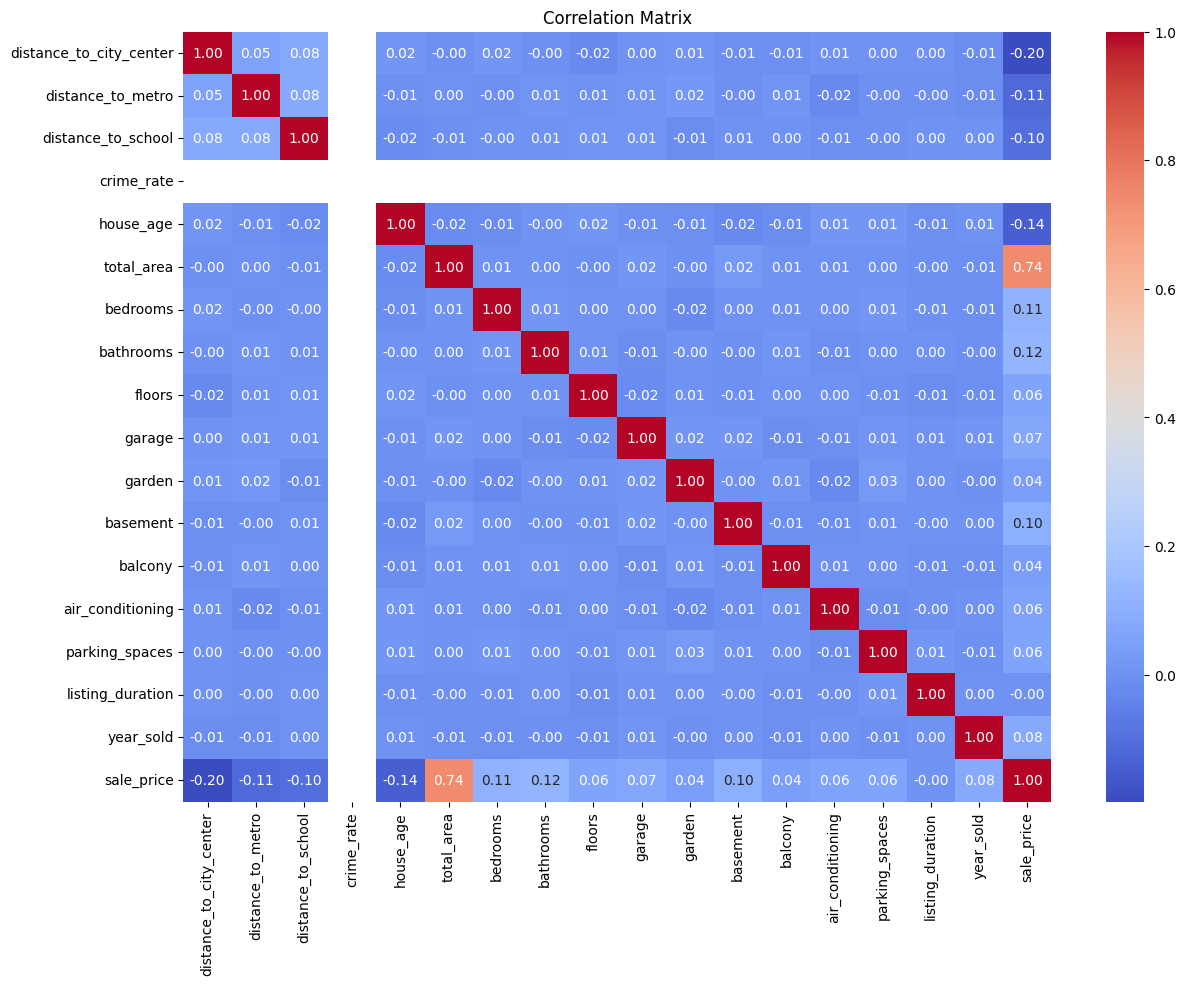

Highly correlated feature pairs (|correlation| > 0.8):


In [62]:
# Correlation heatmap
plt.figure(figsize=(14,10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify multicollinearity (correlations > 0.8 or < -0.8)
import numpy as np

threshold = 0.8
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr = [(a, b, r) for (a, b), r in corr_pairs.items() if a != b and abs(r) > threshold]
print("Highly correlated feature pairs (|correlation| > 0.8):")
for a, b, r in high_corr:
    print(f"{a} ↔ {b} = {r:.2f}")


In [63]:
# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Example: create new features
df_encoded['price_per_sqft'] = df_encoded['sale_price'] / df_encoded['total_area']

# Date-related features if 'date_sold' is available
if 'date_sold' in df.columns:
    df['date_sold'] = pd.to_datetime(df['date_sold'])
    df['sold_month'] = df['date_sold'].dt.month
    df['sold_quarter'] = df['date_sold'].dt.quarter
    df_encoded['sold_month'] = df['sold_month']
    df_encoded['sold_quarter'] = df['sold_quarter']


In [64]:
# Remove outliers using IQR for sale_price
Q1 = df_encoded['sale_price'].quantile(0.25)
Q3 = df_encoded['sale_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_encoded = df_encoded[(df_encoded['sale_price'] >= lower_bound) & (df_encoded['sale_price'] <= upper_bound)]

# Drop one feature from highly correlated pairs (manual or automatic)
# Example: drop one of each correlated pair found earlier
to_drop = ['garage']  # <- Replace this list with your chosen correlated features to remove
df_encoded.drop(columns=to_drop, inplace=True)


In [65]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6400, 8045)
Test shape: (1600, 8045)


In [66]:
print(df.columns.tolist())


['property_id', 'neighborhood', 'distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'crime_rate', 'house_age', 'total_area', 'bedrooms', 'bathrooms', 'floors', 'garage', 'garden', 'basement', 'balcony', 'construction_quality', 'renovation_status', 'heating_type', 'air_conditioning', 'parking_spaces', 'energy_efficiency', 'listing_duration', 'season_sold', 'year_sold', 'sale_price']


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define target and features
X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 13727.47
Root Mean Squared Error: 117.16
R² Score: 0.89


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


MAE: 83.97
MSE: 13727.47
RMSE: 117.16
R-squared: 0.8873


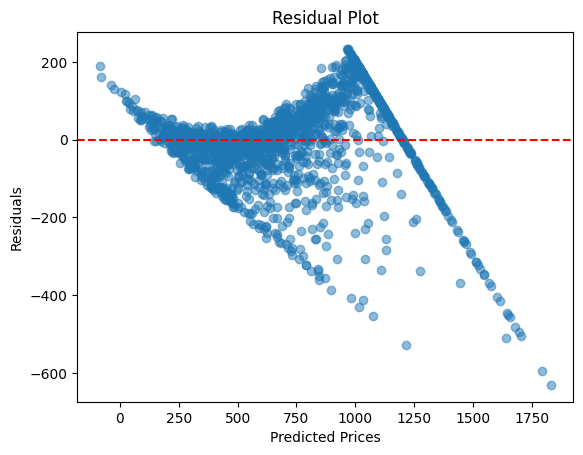

In [69]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Then rerun the evaluation
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
